In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math as math
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [2]:
final_pairs = pd.read_excel('final_pairs.xlsx')

In [3]:
final_pairs

,Unnamed: 0,Leg1,Leg2,Concat,Hedge Ratio,Hurst Exponent,Half Life
0,0,EIAEBRT,OILBREN,EIAEBRT-OILBREN,0.991420,0.100757,2.774739
1,1,EIAEBRT,EIAUSGJ,EIAEBRT-EIAUSGJ,0.025927,0.251996,19.148882
2,2,EIAEBRT,BFO1MEU,EIAEBRT-BFO1MEU,0.949403,0.279794,8.413260
3,3,EIAEBRT,GOEUARA,EIAEBRT-GOEUARA,8.049399,0.262344,7.880515
4,4,EIAEBRT,EIALALS,EIAEBRT-EIALALS,0.025373,0.252045,54.338440
5,5,EIAEBRT,EIANYHO,EIAEBRT-EIANYHO,0.025364,0.290959,30.625945
6,6,EIAEBRT,EIANYLS,EIAEBRT-EIANYLS,0.025535,0.291860,56.239538
7,7,EIAEBRT,EIAGCLS,EIAEBRT-EIAGCLS,0.025262,0.235485,43.617244
8,8,EIAEBRT,DIESELA,EIAEBRT-DIESELA,0.025198,0.253220,51.954978
9,9,EIAEBRT,FUELOIL,EIAEBRT-FUELOIL,0.025350,0.288393,30.677773


In [4]:
rawdata = pd.read_excel('commod_data.xlsx')

In [5]:
rawdata = rawdata.set_index('Date')

In [6]:
rawdata

,CRUDOIL,GOLDBLN,LCPCASH,EIAEBRT,OILBREN,WHEATSF,LAHCASH,LNICASH,CORNUS2,SILVERH,...,FUELOIL,NATBGAS,EEXPEAK,DAPNOCB,WSUGDLY,WOLAWCE,WSUGDLY.1,PAOLMAL,USTEERS,MILKGDA
Date,,,,,,,,,,,,,,,,,,,,,
2008-08-01,123.26,914.40,8073.0,124.16,123.98,5.83,2884.45,18172.0,5.15,17.57,...,3.4143,1.156113,126.982151,1195.60,831,804.64320,0.1489,1100.0,96.92,1.4400
2008-08-04,121.41,906.20,7734.0,121.87,121.63,5.53,2831.00,17887.0,4.85,17.09,...,3.3251,1.115142,108.001374,1192.80,831,805.80960,0.1423,1050.0,96.94,1.4400
2008-08-05,119.17,880.40,7768.0,116.50,116.88,5.92,2849.50,17474.0,4.75,16.68,...,3.2595,1.085193,110.651676,1192.80,831,792.33120,0.1476,1000.0,96.94,1.4400
2008-08-06,118.58,878.40,7767.0,114.47,114.62,5.83,2855.75,17678.0,4.60,16.50,...,3.2155,1.078347,122.037714,1192.80,831,785.76480,0.1499,1000.0,97.00,1.4400
2008-08-07,120.02,872.85,7810.0,116.94,117.00,6.21,2868.25,18749.0,4.72,16.26,...,3.2115,1.060588,109.358182,1192.80,831,767.87190,0.1456,1015.0,97.59,1.4400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,99.49,1898.40,9783.8,99.27,102.22,10.71,3073.50,32607.0,7.79,23.60,...,4.2167,1.950124,241.391126,1047.20,473,976.78985,0.1894,1990.0,143.02,1.7550
2022-04-26,101.70,1905.32,9863.5,102.89,105.08,10.92,3048.60,33055.0,7.79,23.54,...,4.5100,2.064209,254.079155,1047.20,473,977.88345,0.1898,1940.0,143.02,1.7075
2022-04-27,102.02,1885.36,9866.5,103.30,105.33,10.90,3080.70,33281.0,7.92,23.37,...,4.8035,1.871173,232.751367,1047.20,473,972.87985,0.1897,1940.0,143.02,1.7275


In [7]:
traindata = rawdata.loc['2017-01-01':'2017-12-31',]

In [8]:
testdata = rawdata.loc['2018-01-01':,]

In [9]:
traindata

,CRUDOIL,GOLDBLN,LCPCASH,EIAEBRT,OILBREN,WHEATSF,LAHCASH,LNICASH,CORNUS2,SILVERH,...,FUELOIL,NATBGAS,EEXPEAK,DAPNOCB,WSUGDLY,WOLAWCE,WSUGDLY.1,PAOLMAL,USTEERS,MILKGDA
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-02,53.72,1157.49,5523.00,54.96,56.71,3.98,1704.00,9964.00,3.37,16.05,...,1.6122,0.662679,59.108313,319.67,395,981.15550,0.1920,1650.0,117.44,1.0200
2017-01-03,52.33,1156.11,5486.50,55.05,56.30,3.99,1698.00,9854.50,3.41,16.48,...,1.5906,0.605317,46.136113,319.67,395,978.31000,0.2007,1670.0,117.44,1.0200
2017-01-04,53.26,1164.57,5629.00,54.57,55.97,4.11,1696.00,10164.50,3.45,16.47,...,1.5960,0.623263,40.246802,319.67,395,986.37225,0.2036,1650.0,117.44,1.0275
2017-01-05,53.76,1183.56,5560.50,54.99,56.17,4.18,1709.75,10241.00,3.46,16.66,...,1.6037,0.629519,62.288652,319.67,395,995.17975,0.2039,1660.0,117.44,1.0275
2017-01-06,53.99,1174.35,5569.25,55.90,57.03,4.16,1721.00,10191.25,3.43,16.48,...,1.6049,0.613117,60.461180,319.67,395,991.79225,0.2036,1650.0,117.44,1.0525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-25,58.12,1274.29,7085.00,64.61,64.90,4.29,2181.25,12072.50,3.22,16.41,...,1.8839,0.759857,21.360441,399.59,450,1358.36800,0.1458,1210.0,119.97,0.6650
2017-12-26,59.97,1282.51,7085.00,64.61,64.90,4.26,2181.25,12072.50,3.24,16.53,...,1.9576,0.759829,-14.819297,399.59,450,1358.54400,0.1458,1210.0,119.97,0.6500
2017-12-27,59.64,1286.08,7202.25,66.03,66.41,4.33,2241.75,12048.50,3.25,16.69,...,1.9514,0.736571,54.067555,399.59,450,1366.64000,0.1487,1240.0,119.97,0.6600


In [10]:
testdata

,CRUDOIL,GOLDBLN,LCPCASH,EIAEBRT,OILBREN,WHEATSF,LAHCASH,LNICASH,CORNUS2,SILVERH,...,FUELOIL,NATBGAS,EEXPEAK,DAPNOCB,WSUGDLY,WOLAWCE,WSUGDLY.1,PAOLMAL,USTEERS,MILKGDA
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,60.42,1303.46,7207.00,66.73,66.61,4.32,2256.00,12705.50,3.23,17.01,...,1.9928,0.763357,-25.769111,399.59,449,1376.58400,0.1507,1242.5,122.84,0.6775
2018-01-02,60.37,1313.10,7160.75,66.65,66.35,4.38,2252.00,12561.50,3.27,17.15,...,1.9825,0.750267,56.322421,399.59,449,1378.34400,0.1523,1260.0,122.84,0.6700
2018-01-03,61.63,1316.26,7101.00,67.85,67.50,4.42,2212.50,12360.75,3.27,17.18,...,2.0300,0.739026,17.422147,399.59,449,1378.69600,0.1524,1290.0,122.84,0.6700
2018-01-04,62.01,1317.88,7145.75,68.73,68.05,4.40,2235.00,12602.50,3.25,17.20,...,2.0149,0.735033,54.074289,399.04,449,1383.62400,0.1520,1305.0,122.84,0.6700
2018-01-05,61.44,1319.36,7078.50,68.01,67.58,4.36,2188.25,12487.75,3.25,17.25,...,2.0113,0.717618,54.464920,399.04,449,1383.00800,0.1506,1300.0,122.84,0.6800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-25,99.49,1898.40,9783.80,99.27,102.22,10.71,3073.50,32607.00,7.79,23.60,...,4.2167,1.950124,241.391126,1047.20,473,976.78985,0.1894,1990.0,143.02,1.7550
2022-04-26,101.70,1905.32,9863.50,102.89,105.08,10.92,3048.60,33055.00,7.79,23.54,...,4.5100,2.064209,254.079155,1047.20,473,977.88345,0.1898,1940.0,143.02,1.7075
2022-04-27,102.02,1885.36,9866.50,103.30,105.33,10.90,3080.70,33281.00,7.92,23.37,...,4.8035,1.871173,232.751367,1047.20,473,972.87985,0.1897,1940.0,143.02,1.7275


In [11]:
return_df = (testdata / testdata.shift(1)) - 1

In [12]:
df_results = pd.DataFrame()

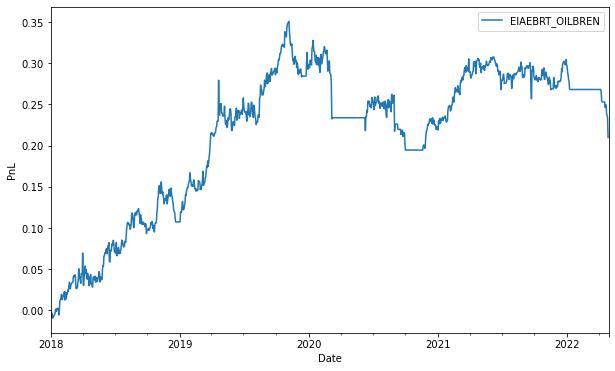

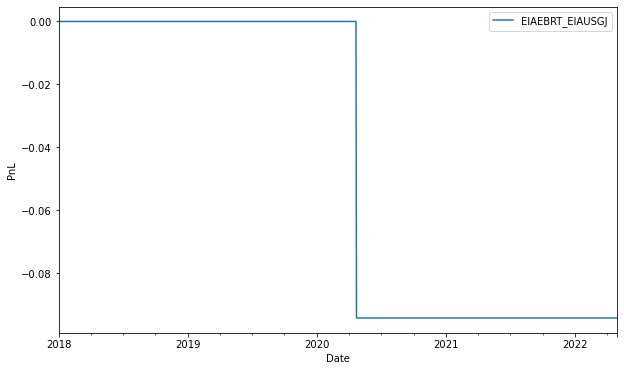

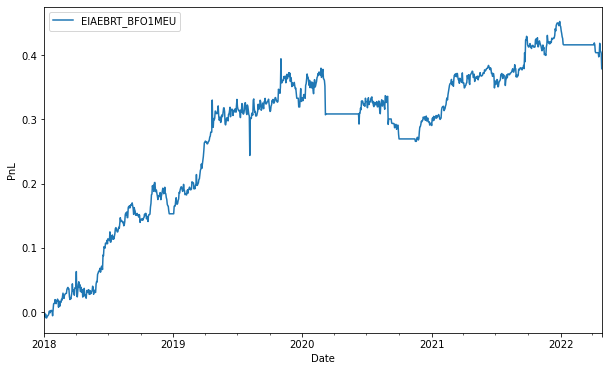

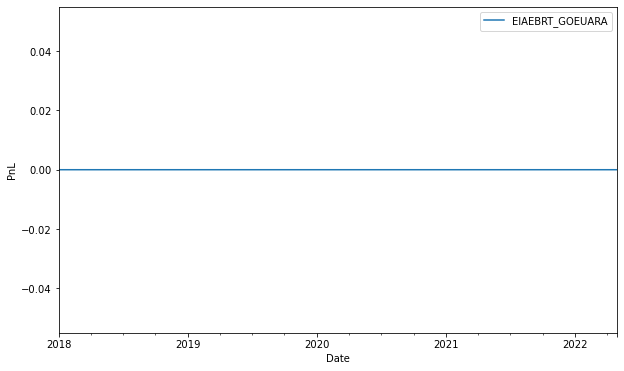

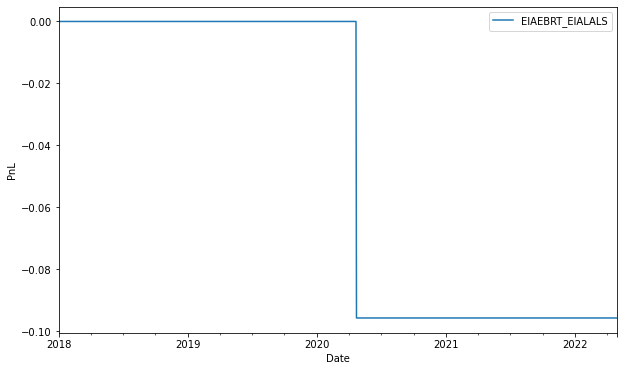

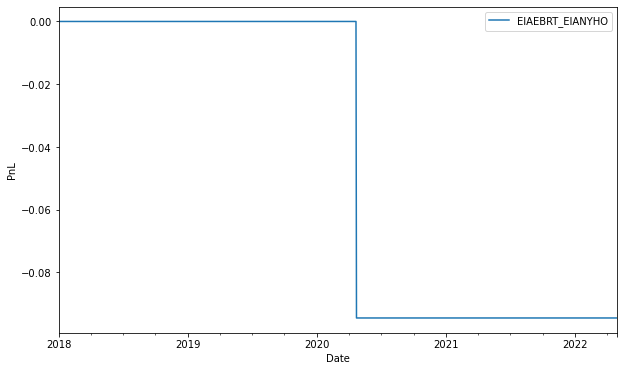

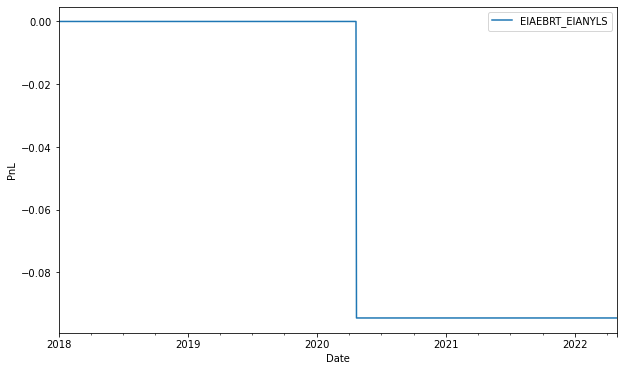

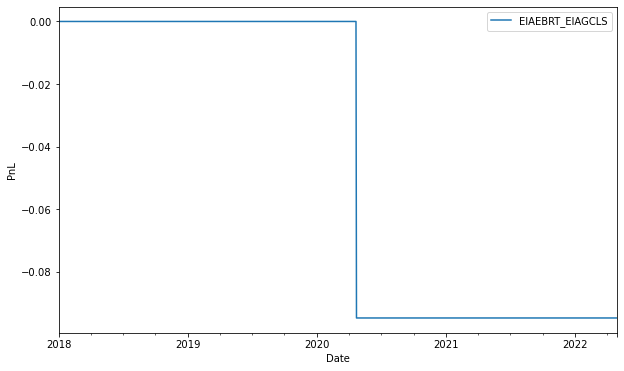

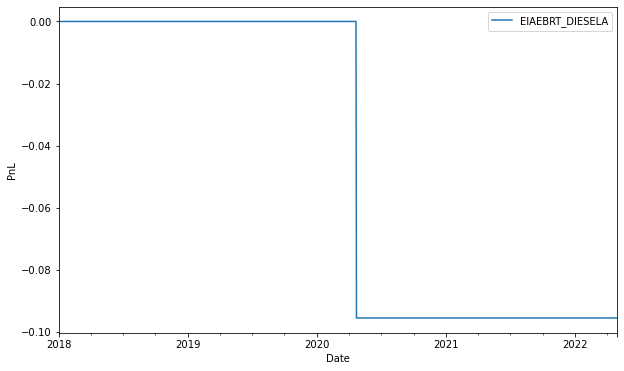

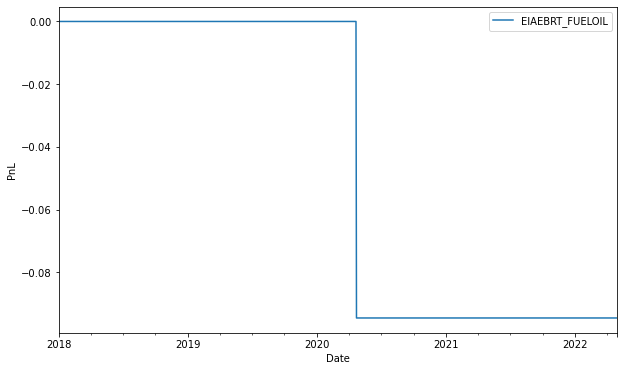

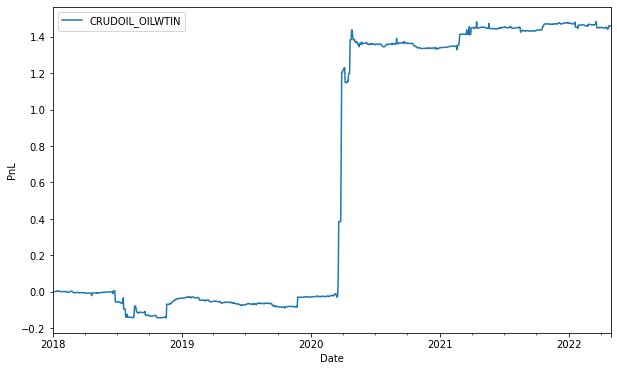

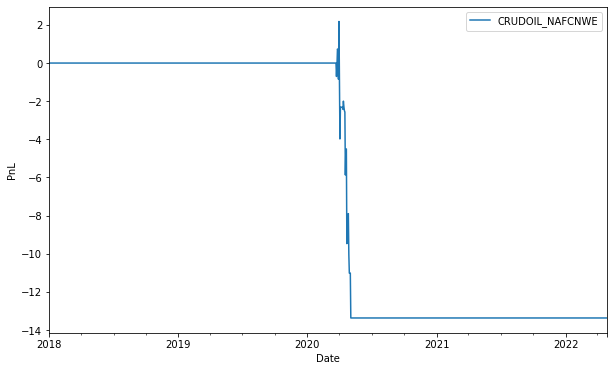

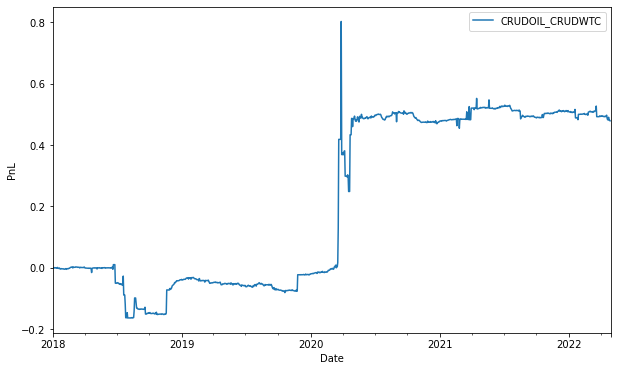

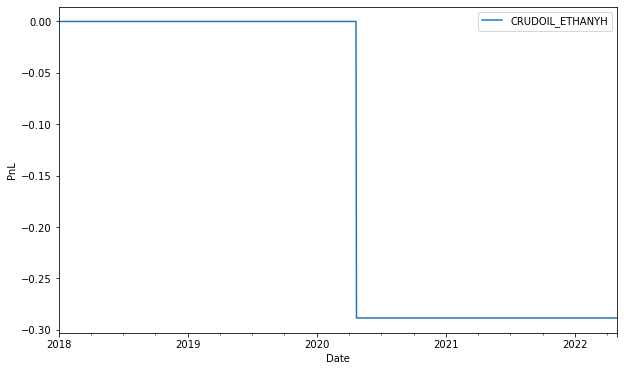

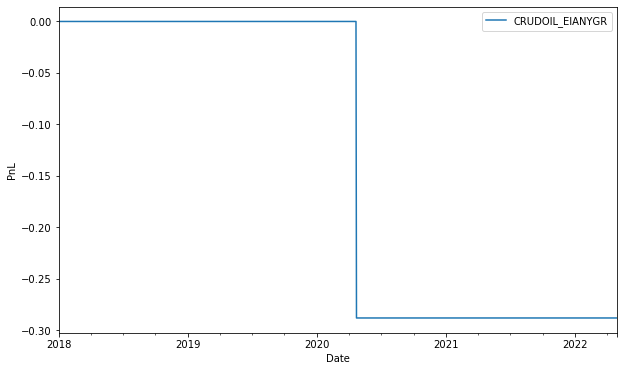

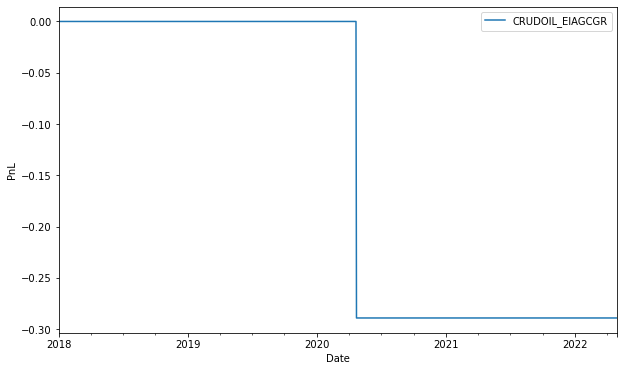

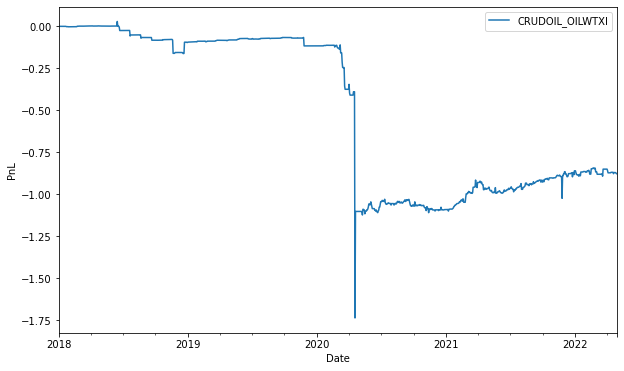

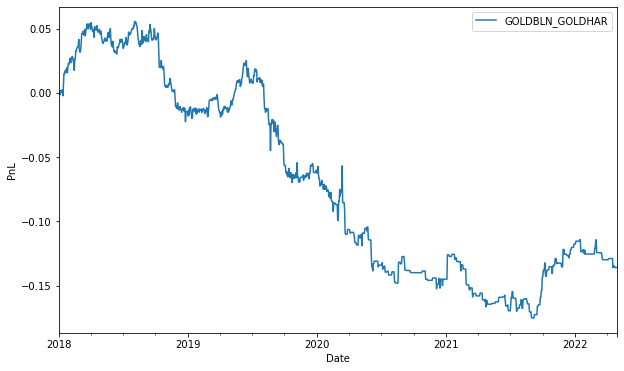

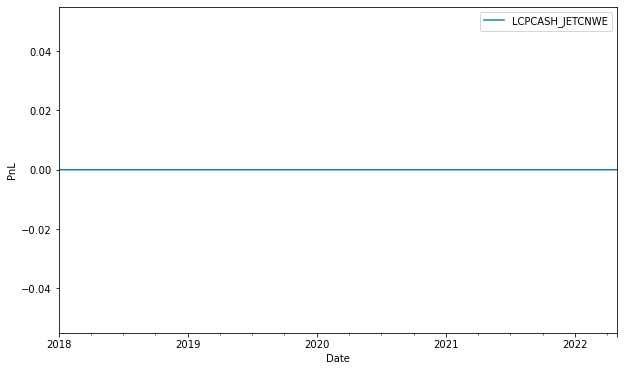

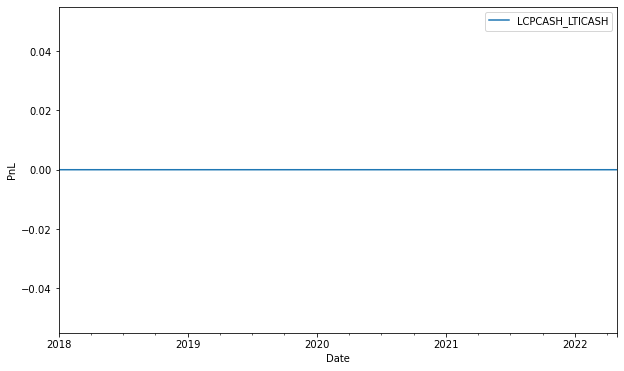

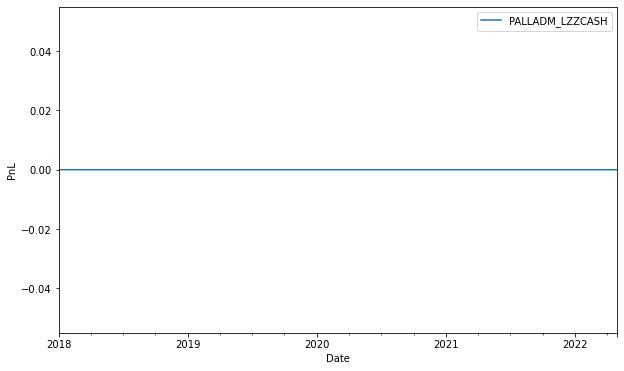

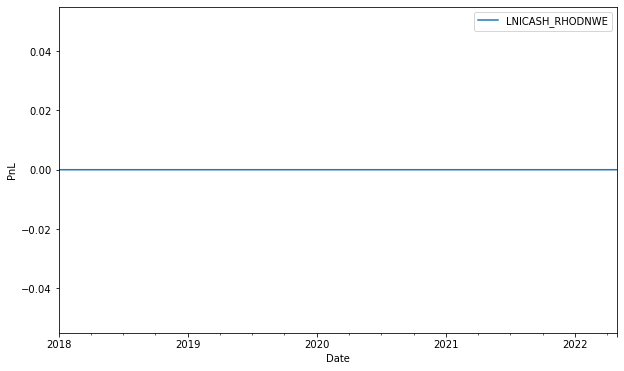

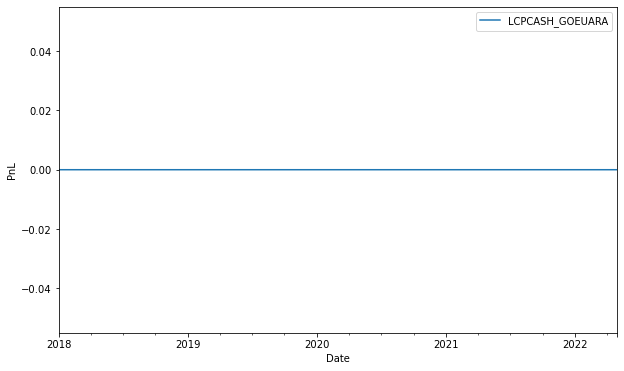

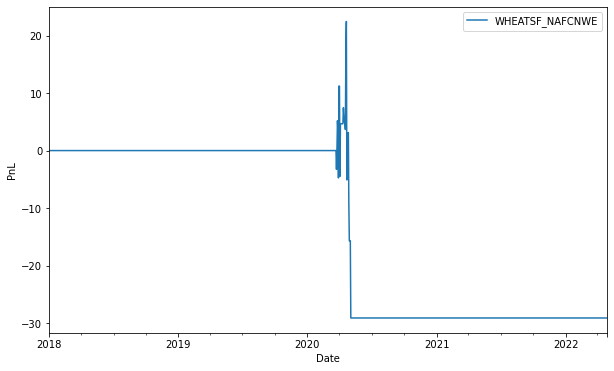

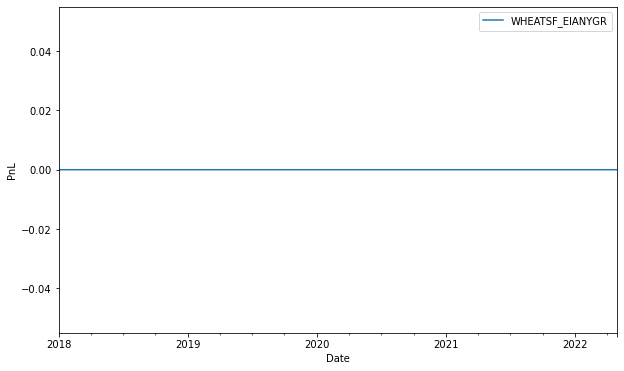

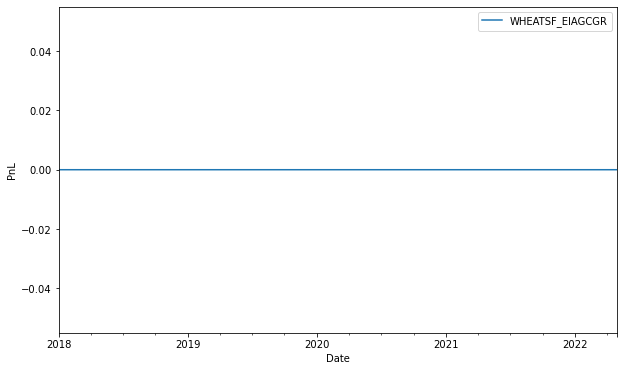

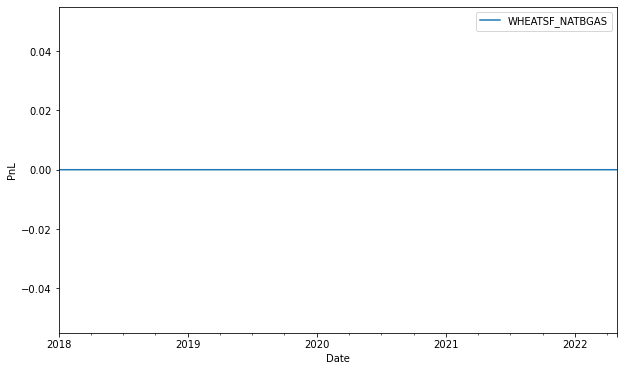

In [13]:
for i in range(len(final_pairs)):
    X1 = final_pairs['Leg1'][i]
    X2 = final_pairs['Leg2'][i]

    x = traindata[X1].array.reshape((-1, 1))
    y = traindata[X2].array

    reg = LinearRegression().fit(x,y)

    beta = reg.coef_
    alpha = reg.intercept_

    Spread = rawdata[X1] - beta*rawdata[X2] - alpha

    df = pd.DataFrame()
    df[X1] = rawdata[X1]
    df[X2] = rawdata[X2]
    df['Spread'] = Spread
    df['Spread VOL'] = df['Spread'].loc['2017-01-01':'2017-12-31',].std() #Spread volatility for training set 

    #Time to backtest on unseen/test data from JAN 2018
    df = df.loc["2018-01-01":,]

    df['position'] = 0
    df.loc[df['Spread']> 0*df['Spread VOL'], 'position'] = -1
    df.loc[df['Spread']< 0*-df['Spread VOL'], 'position'] = 1
#     df.loc[df['Spread']> 1*df['Spread VOL'], 'position'] = -3
#     df.loc[df['Spread']< 1*-df['Spread VOL'], 'position'] = 3
#     df.loc[df['Spread']> 2*df['Spread VOL'], 'position'] = -5
#     df.loc[df['Spread']< 2*-df['Spread VOL'], 'position'] = 5
    df.loc[df['Spread']> 2.5*df['Spread VOL'], 'position'] = 0
    df.loc[df['Spread']< 2.5*-df['Spread VOL'], 'position'] = 0

    df['X1X2position'] = df['position'].shift(1)
    df['X1position'] = df['X1X2position']
    df['X2position'] = df['X1X2position']*beta*-1
    df['dailypnl'] = df['X2position']*return_df[X2].shift(-1) + df['X1position']*return_df[X1].shift(-1)
    df['cumpnl'] = df['dailypnl'].cumsum()
    df['cumpnl'].plot(figsize=(10,6),label = X1 +"_"+ X2)
    plt.xlabel("Date")
    plt.ylabel("PnL")
    plt.legend()
    plt.show()
    df.to_csv('{}.csv'.format(X1 +"_"+ X2))

### Results with positive PnL

In [14]:
result1 = pd.read_csv("EIAEBRTOILBREN.csv")

In [15]:
result2 = pd.read_csv("EIAEBRTBFO1MEU.csv")

In [16]:
result3 = pd.read_csv("CRUDOILOILWTIN.csv")

In [40]:
EIAEBRTOILBREN_PnL = result1.dailypnl.cumsum()
EIAEBRTOILBREN_dailyPnL = result1.dailypnl
EIAEBRTBFO1MEU_PnL = result2.dailypnl.cumsum()
EIAEBRTBFO1MEU_dailyPnL = result2.dailypnl
CRUDOILOILWTIN_PnL = result3.dailypnl.cumsum()
CRUDOILOILWTIN_dailyPnL = result3.dailypnl

In [28]:
def annual_returns(returns):

    num_years = len(returns) / 252

    cum_ret_final = (returns + 1).prod().squeeze()

    return cum_ret_final ** (1 / num_years) - 1
def sharpe(returns, risk_free=0):
    adj_returns = returns - risk_free
    return (np.nanmean(adj_returns) * np.sqrt(252)) \
        / np.nanstd(adj_returns, ddof=1)

def downside_risk(returns, risk_free=0):
    adj_returns = returns - risk_free
    sqr_downside = np.square(np.clip(adj_returns, np.NINF, 0))
    return np.sqrt(np.nanmean(sqr_downside) * 252)


def sortino(returns, risk_free=0):
    adj_returns = returns - risk_free
    drisk = downside_risk(adj_returns)

    if drisk == 0:
        return np.nan

    return (np.nanmean(adj_returns) * np.sqrt(252)) \
        / drisk

def max_drawdown(returns):
    wealth_index = 1000*(1+returns).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdown = (wealth_index - previous_peaks)/previous_peaks
    return drawdown.min()

In [46]:
#EIAEBRTOILBREN_PnL 
print('Cummulative return:',EIAEBRTOILBREN_PnL.iloc[-2])
print('Sharpe ratio:',sharpe(EIAEBRTOILBREN_dailyPnL))
print('Sortino ratio:',sortino(EIAEBRTOILBREN_dailyPnL))
print('max_drawdown:',max_drawdown(EIAEBRTOILBREN_dailyPnL))

Cummulative return: 0.20988748027917156
Sharpe ratio: 0.4681616206861094
Sortino ratio: 0.04090060655683221
max_drawdown: -0.14966860539302643


In [45]:
#EIAEBRTBFO1MEU_PnL
print('Cummulative return:',EIAEBRTBFO1MEU_PnL.iloc[-2])
print('Sharpe ratio:',sharpe(EIAEBRTBFO1MEU_dailyPnL))
print('Sortino ratio:',sortino(EIAEBRTBFO1MEU_dailyPnL))
print('max_drawdown:',max_drawdown(EIAEBRTBFO1MEU_dailyPnL))

Cummulative return: 0.3787973508485675
Sharpe ratio: 0.7556632171034969
Sortino ratio: 0.0680822677396759
max_drawdown: -0.1265475029269914


In [49]:
#CRUDOILOILWTIN_PnL
print('Cummulative return:',CRUDOILOILWTIN_PnL.iloc[-2])
print('Sharpe ratio:',sharpe(CRUDOILOILWTIN_dailyPnL))
print('Sortino ratio:',sortino(CRUDOILOILWTIN_dailyPnL))
print('max_drawdown:',max_drawdown(CRUDOILOILWTIN_dailyPnL))

Cummulative return: 1.4581940623099334
Sharpe ratio: 0.9509660730466953
Sortino ratio: 0.25139547247491156
max_drawdown: -0.14540225198445764
